In [1]:
import pandas as pd
import random

In [2]:
L =[]
for i in range(1000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    L.append(a + b)
    

In [3]:
len(L)

1000

In [4]:
L[:5]

[7, 11, 6, 11, 6]

In [5]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [6]:
import numpy as np
np.cumsum(s)

2     0.023
3     0.084
4     0.179
5     0.295
6     0.448
7     0.600
8     0.729
9     0.823
10    0.900
11    0.971
12    1.000
Name: count, dtype: float64

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: >

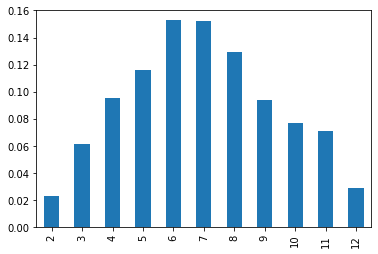

In [7]:
s.plot(kind='bar')

<Axes: >

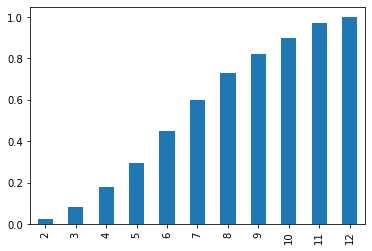

In [8]:
np.cumsum(s).plot(kind='bar')

In [9]:
# Parametric Density Estimation 
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)

In [10]:
sample.mean()

50.08655593118638

(array([  9.,  23.,  77., 159., 200., 224., 179.,  82.,  41.,   6.]),
 array([35.18716381, 38.1055875 , 41.0240112 , 43.94243489, 46.86085858,
        49.77928227, 52.69770597, 55.61612966, 58.53455335, 61.45297705,
        64.37140074]),
 <BarContainer object of 10 artists>)

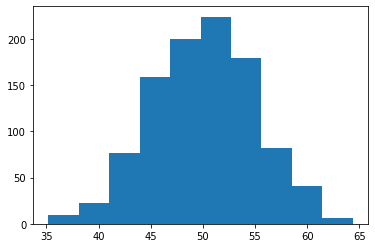

In [11]:
# plot histogram to understand the distribution of data
plt.hist(sample, bins=10)

In [12]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [13]:
# fit distribution with the above parameter 
from scipy.stats import norm
dist = norm(50, 12)

In [14]:
values = np.linspace(sample.min(), sample.max(), 100)

In [15]:
sample.max()

64.37140073849427

In [16]:
probabilities = [dist.pdf(value) for value in values]

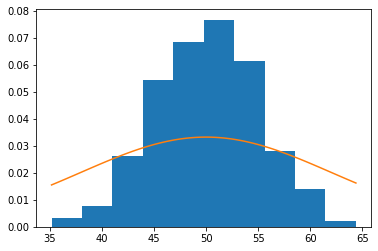

In [17]:
# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

<Axes: ylabel='Count'>

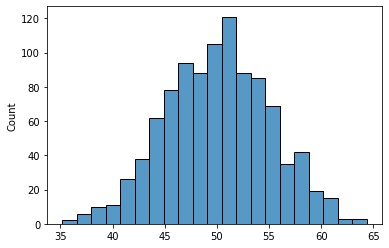

In [18]:
import seaborn as sns
sns.histplot(sample)

In [19]:
# KDE 

In [20]:
# generate a sample
sample1 = normal(loc=20, scale=5, size = 300)
sample2 = normal(loc=40, scale=5, size = 700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  1.,  1.,  1.,  1.,  4.,  4.,  4., 20., 13., 18., 17.,
        23., 26., 24., 19., 22., 23., 15., 23., 16., 12.,  6.,  7., 12.,
        12., 20., 35., 31., 43., 47., 65., 64., 52., 61., 54., 44., 40.,
        32., 26., 21., 10., 10.,  3.,  2.,  8.,  3.,  2.,  2.]),
 array([ 2.95546596,  4.02541261,  5.09535926,  6.16530591,  7.23525255,
         8.3051992 ,  9.37514585, 10.4450925 , 11.51503914, 12.58498579,
        13.65493244, 14.72487909, 15.79482573, 16.86477238, 17.93471903,
        19.00466568, 20.07461232, 21.14455897, 22.21450562, 23.28445227,
        24.35439891, 25.42434556, 26.49429221, 27.56423886, 28.6341855 ,
        29.70413215, 30.7740788 , 31.84402545, 32.91397209, 33.98391874,
        35.05386539, 36.12381204, 37.19375868, 38.26370533, 39.33365198,
        40.40359863, 41.47354527, 42.54349192, 43.61343857, 44.68338522,
        45.75333186, 46.82327851, 47.89322516, 48.96317181, 50.03311845,
        51.1030651 , 52.17301175, 53.2429584 , 54.31290504,

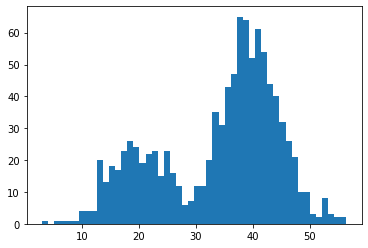

In [21]:
# plot histogram bins =50
plt.hist(sample, bins=50)

In [22]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [23]:
values = np.linspace(sample.min(), sample.max(),100)
values = values.reshape((len(values), 1))

In [24]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

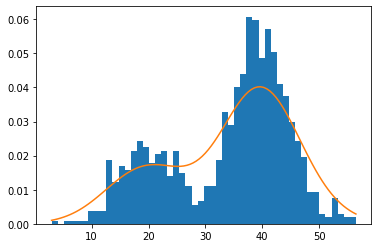

In [25]:
plt.hist(sample, bins = 50, density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

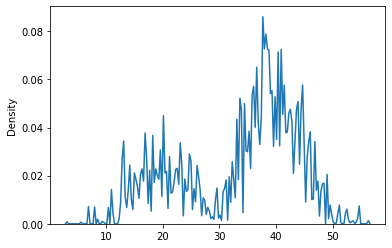

In [26]:
import seaborn as sns
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [27]:
import seaborn as sns

In [28]:
df = sns.load_dataset('iris')

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

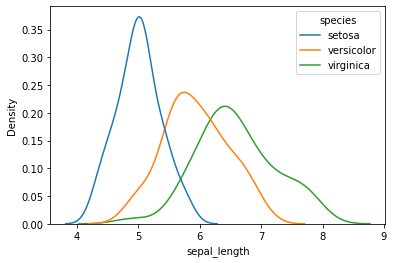

In [30]:
sns.kdeplot(data=df, x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

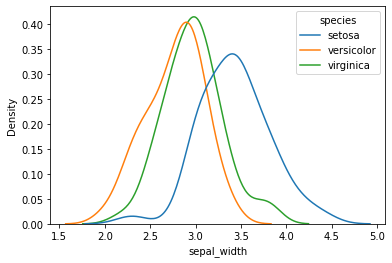

In [31]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

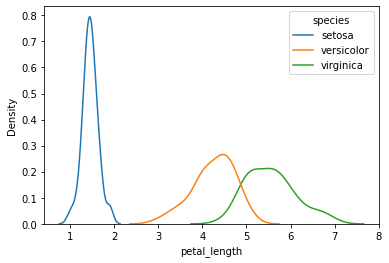

In [32]:
sns.kdeplot(data=df,x='petal_length',hue='species')

In [35]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue=df['species'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [ ]:

sns.kdeplot(x)

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
titanic['Age'].skew()

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

In [ ]:
titanic[titanic['Age'] > 73] 

In [ ]:
titanic['Age'].max()